<a href="https://colab.research.google.com/github/benasphy/Linear-Regression/blob/main/Batch%20GD%20vs%20SGD%20VS%20Mini-batch%20GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Results ---
Batch GD:
  θ = [4.17478026 2.92260742]
  Final MSE = 0.9750
  Time: 0.0965 seconds
SGD:
  θ = [4.37087338 2.90021491]
  Final MSE = 1.0055
  Time: 3.4812 seconds
Mini-Batch GD:
  θ = [4.18222992 2.88277183]
  Final MSE = 0.9765
  Time: 0.0617 seconds


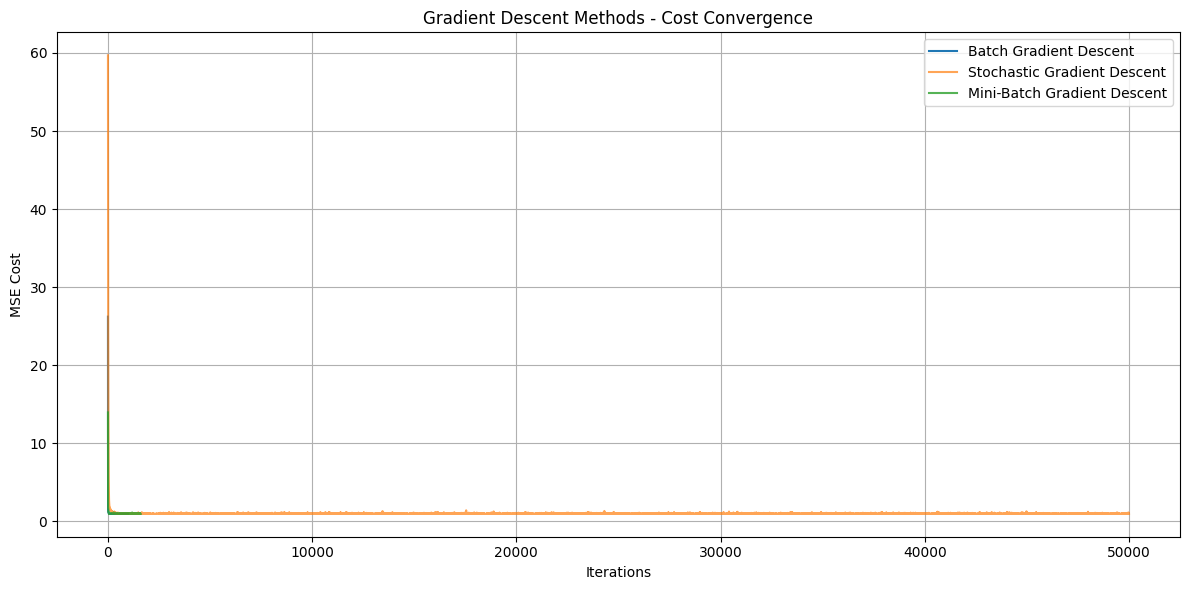

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate synthetic data: y = 4 + 3x + noise
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1

def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    return np.mean(errors ** 2)

# ---------------- Batch Gradient Descent ----------------
def batch_gradient_descent(X, y, lr=0.1, n_iters=1000):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    start = time.time()

    for _ in range(n_iters):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        cost_history.append(compute_mse(X, y, theta))

    end = time.time()
    return theta, cost_history, end - start

# ---------------- Stochastic Gradient Descent ----------------
def stochastic_gradient_descent(X, y, lr=0.01, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    start = time.time()

    for epoch in range(n_epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            cost_history.append(compute_mse(X, y, theta))

    end = time.time()
    return theta, cost_history, end - start

# ---------------- Mini-Batch Gradient Descent ----------------
def mini_batch_gradient_descent(X, y, lr=0.1, n_epochs=50, batch_size=32):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    start = time.time()

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/xi.shape[0] * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            cost_history.append(compute_mse(X, y, theta))

    end = time.time()
    return theta, cost_history, end - start

# Run all 3 methods
theta_bgd, cost_bgd, time_bgd = batch_gradient_descent(X_b, y)
theta_sgd, cost_sgd, time_sgd = stochastic_gradient_descent(X_b, y)
theta_mbgd, cost_mbgd, time_mbgd = mini_batch_gradient_descent(X_b, y)

# Print out values and timings
print("\n--- Results ---")
print(f"Batch GD:\n  θ = {theta_bgd.ravel()}\n  Final MSE = {cost_bgd[-1]:.4f}\n  Time: {time_bgd:.4f} seconds")
print(f"SGD:\n  θ = {theta_sgd.ravel()}\n  Final MSE = {cost_sgd[-1]:.4f}\n  Time: {time_sgd:.4f} seconds")
print(f"Mini-Batch GD:\n  θ = {theta_mbgd.ravel()}\n  Final MSE = {cost_mbgd[-1]:.4f}\n  Time: {time_mbgd:.4f} seconds")

# Plot cost over time
plt.figure(figsize=(12, 6))
plt.plot(cost_bgd, label="Batch Gradient Descent")
plt.plot(cost_sgd, label="Stochastic Gradient Descent", alpha=0.7)
plt.plot(cost_mbgd, label="Mini-Batch Gradient Descent", alpha=0.8)
plt.xlabel("Iterations")
plt.ylabel("MSE Cost")
plt.title("Gradient Descent Methods - Cost Convergence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
